# NYC Stop, Question, and Frisk 
Contributors: Anesu Masube and Stephen Williams

## Goal 
Given a variety of factors such as location and race, we aimed to construct a model to predict whether or not an incident would result in an arrest. 

## Table of Contents 


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import yellowbrick

## Data Source 
[NYC Stop, Question, and Frisk Data from 2018](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page)

In [3]:
df = pd.read_csv('cleaned_df.csv', index_col = 0)

## Data Cleaning and Feature Engineering 
Initial data exploration revealed that many categories of the categorical features were sparse (which can be viewed in the [stephen.ipynb](http://localhost:8888/notebooks/stephen.ipynb)) or had many nulls.  To avoid throwing away too much information, nulls were considered to be their own category.  The null values for numerical features suspect height and weight were removed, and then both columns were converted to floats.  Age was binned.  Those columns that contained unique serial numbers, unique entry documentation, or ex post facto information were dropped.  The cleaner DataFrame was exported as [cleaned_df.csv](http://localhost:8888/edit/cleaned_df.csv).

## Modeling and Cross-Validation 
We split the data into train and test sets with a test size of 0.2 of the 10474 observations.  OneHotEncoder was used to generate dummy variable columns for the categorical variables and StandardScaler was used on the numerical variables.

### Models Considered

-Random Rorest Ensemble  
-Support Vector Machine classifier (with a radial basis function kernel)  
-Gradient Boost classifier (XGBoost)  
 
Grid search cross-validation was used to tune the hyperparameters.  Their ultimate specifications can be viewed in [models.py](http://localhost:8888/edit/models.py).

Given that the gradient boost was prohibitively expensive in terms of time, few iterations were used to tune it, so its forthcoming results should be taken tentatively relative to the performance of the other models.

In [4]:
%run -i "models.py"

### Model Metrics  
For accuracy, precision, recall, and f1 score, the random forest model outperformed the other models (the details can be seen in the appendix).  Their confusion matrices (using the training set) illustrate this in a more intuitive fashion.

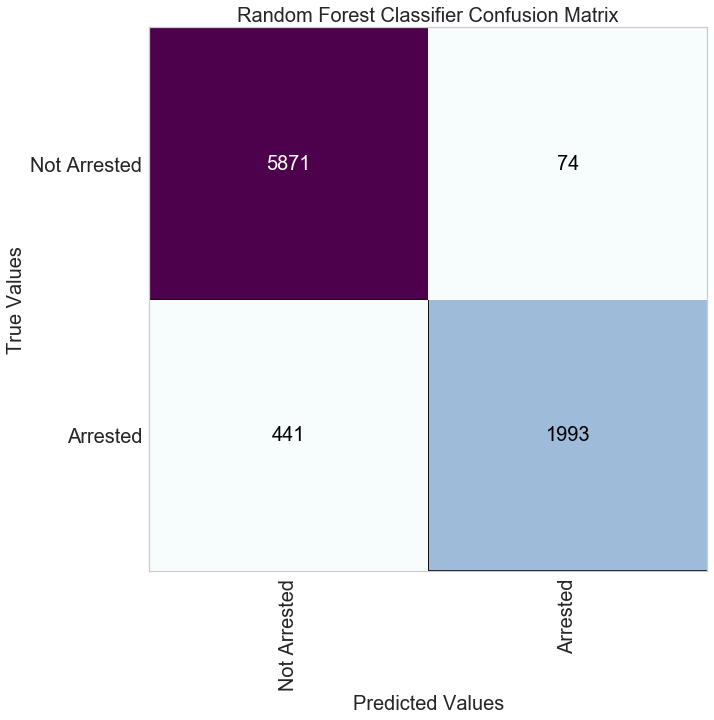

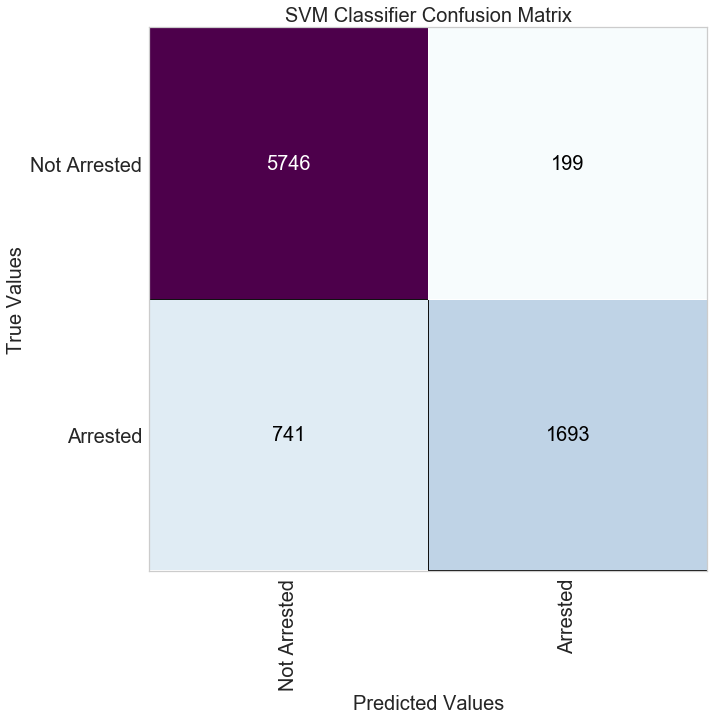

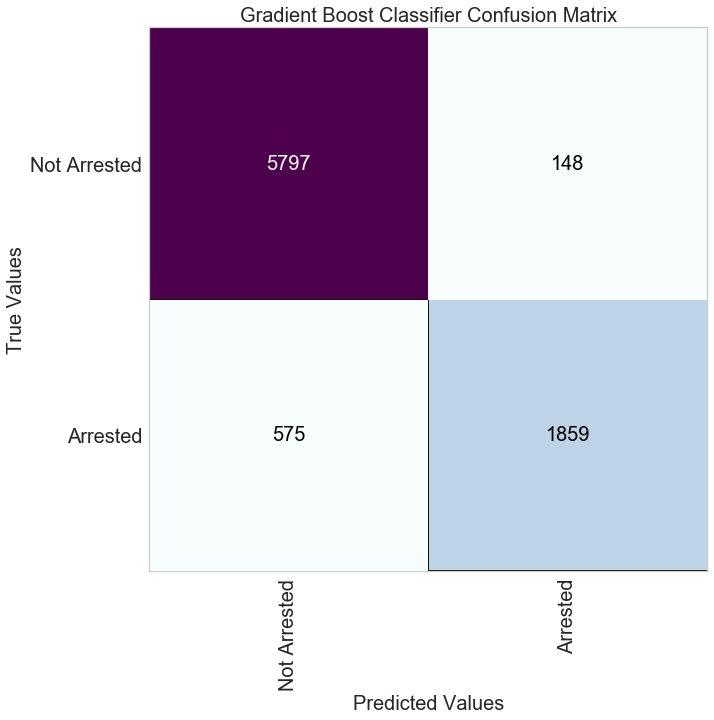

In [81]:
%run -i "confusion_matrices.py"

Given that we are interested in how well this random forest model will perform on new data, the following metrics are composed using the test set of data.

In [83]:
print(classification_report(y_test, rf_test_pred))

              precision    recall  f1-score   support

           N       0.90      0.96      0.93      1504
           Y       0.88      0.73      0.80       591

    accuracy                           0.89      2095
   macro avg       0.89      0.84      0.86      2095
weighted avg       0.89      0.89      0.89      2095



Interpretability is of particular interest, namely, those features that were considered most important by our model, so the following is a list of measured importance (as is determined by gini importance) in descending order.

In [5]:
pd.DataFrame([X_train_new.columns, final_rf.feature_importances_])
tup = list(zip(X_train_new.columns, final_rf.feature_importances_))
sorted(tup, key=lambda x: x[1], reverse=True)

[('SEARCHED_FLAG_Y', 0.15960619058965958),
 ('SEARCHED_FLAG_N', 0.1301893326140399),
 ('OTHER_CONTRABAND_FLAG_Y', 0.033611451463521146),
 ('OTHER_CONTRABAND_FLAG_N', 0.03166105030278386),
 ('SEARCH_BASIS_CONSENT_FLAG_Y', 0.026015987345076142),
 ('WEAPON_FOUND_FLAG_Y', 0.024346645082137543),
 ('WEAPON_FOUND_FLAG_N', 0.02350463902344836),
 ('SEARCH_BASIS_CONSENT_FLAG_(null)', 0.022119329204464504),
 ('STOP_DURATION_MINUTES', 0.020466346066171568),
 ('SUSPECTED_CRIME_DESCRIPTION_CPW', 0.017320091286180596),
 ('SUSPECT_WEIGHT', 0.015871659910076004),
 ('SUSPECT_HEIGHT', 0.014996879142286413),
 ('FIREARM_FLAG_(null)', 0.01471683846299183),
 ('FIREARM_FLAG_Y', 0.012559104594571725),
 ('OBSERVED_DURATION_MINUTES', 0.010027034051960093),
 ('SEARCH_BASIS_HARD_OBJECT_FLAG_Y', 0.009909439346284049),
 ('SEARCH_BASIS_OTHER_FLAG_Y', 0.009740826949608178),
 ('SEARCH_BASIS_OTHER_FLAG_(null)', 0.009660749295108234),
 ('KNIFE_CUTTER_FLAG_(null)', 0.009366396844559411),
 ('SUSPECTED_CRIME_DESCRIPTION_CRI

## Appendix  

### Random Forest Training Set Classification Report

In [84]:
print(classification_report(y_train, rf_train_pred))

              precision    recall  f1-score   support

           N       0.93      0.99      0.96      5945
           Y       0.96      0.82      0.89      2434

    accuracy                           0.94      8379
   macro avg       0.95      0.90      0.92      8379
weighted avg       0.94      0.94      0.94      8379



### SVM Training Set Classification Report

In [85]:
print(classification_report(y_train, svc_train_pred))

              precision    recall  f1-score   support

           N       0.89      0.97      0.92      5945
           Y       0.89      0.70      0.78      2434

    accuracy                           0.89      8379
   macro avg       0.89      0.83      0.85      8379
weighted avg       0.89      0.89      0.88      8379



### XGBoost Training Set Classification Report

In [86]:
print(classification_report(y_train, xgb_train_pred))

              precision    recall  f1-score   support

           N       0.91      0.98      0.94      5945
           Y       0.93      0.76      0.84      2434

    accuracy                           0.91      8379
   macro avg       0.92      0.87      0.89      8379
weighted avg       0.91      0.91      0.91      8379

